In [27]:
import pandas as pd
df = pd.read_csv("../../Assets/SMS Spam Dataset.csv")

# df shape
df.shape
# check missing values
df.isnull().sum()

sms      0
label    0
dtype: int64

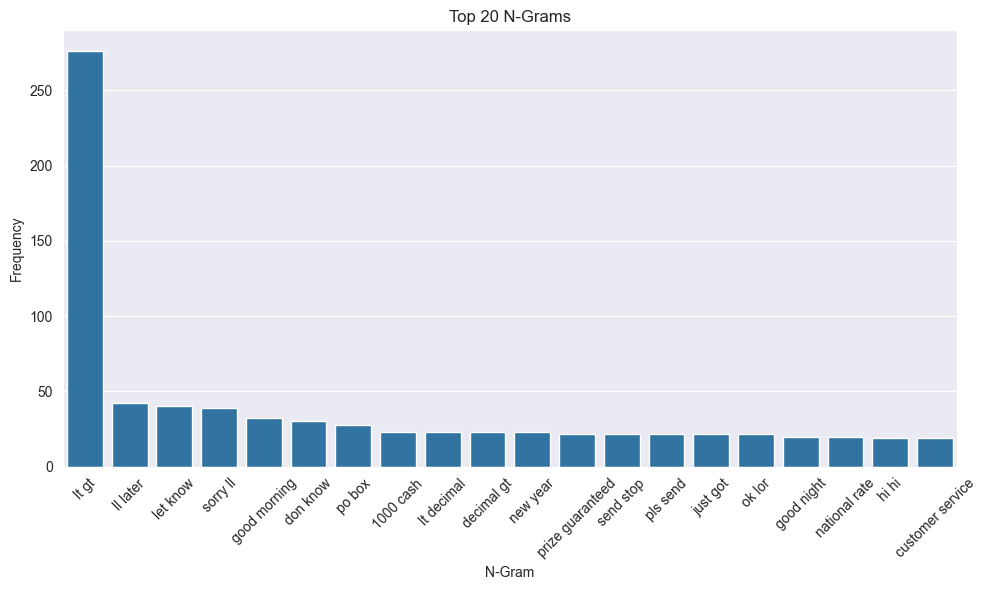

In [28]:
#NGRAM

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(ngram_range=(2, 2), stop_words='english')
X = cv.fit_transform(df['sms'])
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:20]
top_ngrams = [word[0] for word in words_freq]
plt.figure(figsize=(10, 6))
sns.barplot(x=[word[0] for word in words_freq], y=[word[1] for word in words_freq])
plt.title('Top 20 N-Grams')
plt.xlabel('N-Gram')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

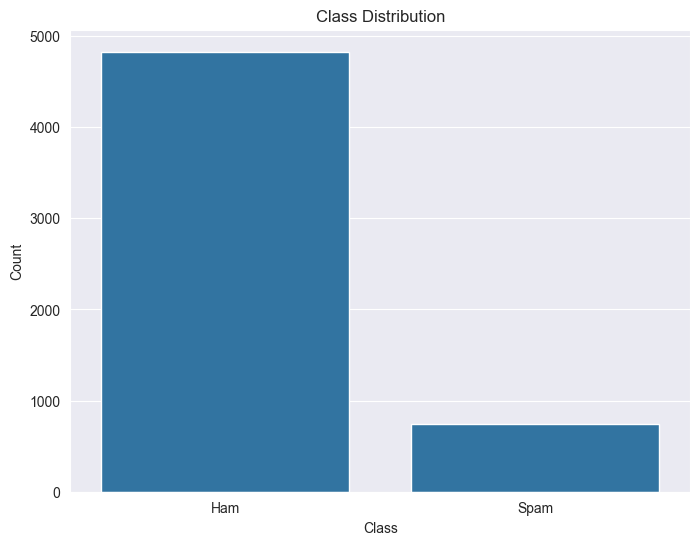

In [29]:
#class distribution

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='label')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.show()

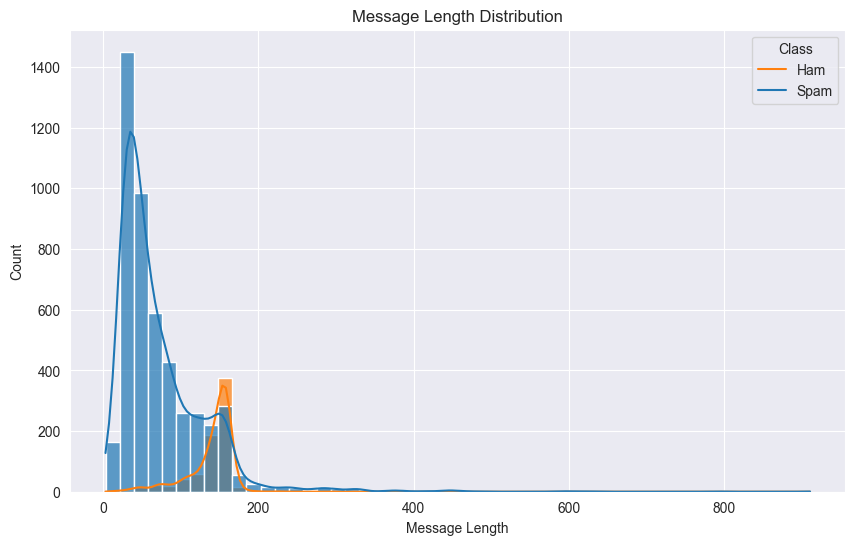

In [30]:
#Message length distribution
df['message_length'] = df['sms'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='message_length', hue='label', bins=50, kde=True, alpha=0.7)
plt.title('Message Length Distribution')
plt.xlabel('Message Length')
plt.ylabel('Count')
plt.legend(title='Class', labels=['Ham', 'Spam'])
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\risha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


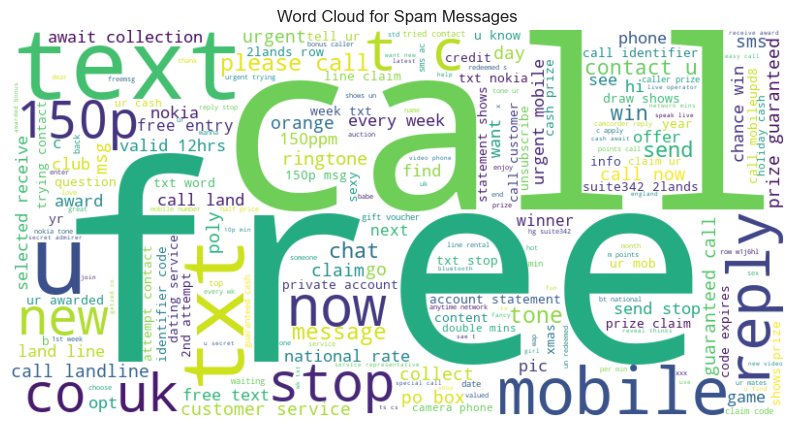

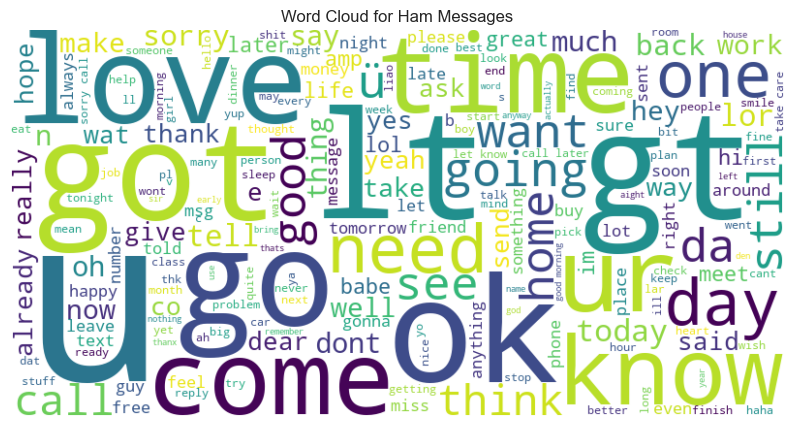

In [31]:
# Word Clouds for both spam and hem messages

from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

# Download stopwords if not already downloaded
import nltk
nltk.download('stopwords')

# Define stopwords for English
stop_words = set(stopwords.words('english'))

# Remove stopwords from spam and ham messages
spam_messages = df[df['label'] == 1]['sms'].str.lower().apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
ham_messages = df[df['label'] == 0]['sms'].str.lower().apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Generate word cloud for spam messages
plt.figure(figsize=(10, 8))
wordcloud_spam = WordCloud(width=800, height=400, background_color='white').generate(' '.join(spam_messages))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.title('Word Cloud for Spam Messages')
plt.axis('off')
plt.show()

# Generate word cloud for ham messages
plt.figure(figsize=(10, 8))
wordcloud_ham = WordCloud(width=800, height=400, background_color='white').generate(' '.join(ham_messages))
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.title('Word Cloud for Ham Messages')
plt.axis('off')
plt.show()

In [32]:
df

,sms,label,message_length
0,"Go until jurong point, crazy.. Available only ...",0,112
1,Ok lar... Joking wif u oni...\n,0,30
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156
3,U dun say so early hor... U c already then say...,0,50
4,"Nah I don't think he goes to usf, he lives aro...",0,62
...,...,...,...
5569,This is the 2nd time we have tried 2 contact u...,1,161
5570,Will ü b going to esplanade fr home?\n,0,37
5571,"Pity, * was in mood for that. So...any other s...",0,58
5572,The guy did some bitching but I acted like i'd...,0,126


In [33]:
import re
#Cleaning Text

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

def clean_text(text):
    #Convert text to lowercase
    text = text.lower()

    #Remove special characters and digits
    text = re.sub(r"[^a-zA-Z\s]", " ", text) #"[^a-zA-Z\s] it means a-z and A-Z and \s except this convert all things to double quotes

    #Removing Links
    text=re.sub(r'http\S+','', text) #http\S it means all characters stick with http word will be removed from the text

    #Tokenize the text
    words = word_tokenize(text)

    #Stopwords Removal
    stop_words = set(stopwords.words('english')) #setting stopwords to eng words
    filtered_words = [word for word in words if word not in stop_words]

    #Stemming/lemmatizer
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in filtered_words]

    #Join the stemmed words back into a single string
    cleaned_text = ' '.join(stemmed_words)

    return cleaned_text



In [34]:
df['clean_text'] = df['sms'].apply(lambda x: clean_text(x))

In [35]:
df.head()

,sms,label,message_length,clean_text
0,"Go until jurong point, crazy.. Available only ...",0,112,go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...\n,0,30,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,free entri wkli comp win fa cup final tkt st m...
3,U dun say so early hor... U c already then say...,0,50,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",0,62,nah think goe usf live around though


In [36]:
df['label'].value_counts() #unbalanced data , it will be bias towards positive 0 side

label
0    4827
1     747
Name: count, dtype: int64

In [37]:
from imblearn.over_sampling import RandomOverSampler

X=df.drop('label', axis=1)
y=df['label']

oversampler = RandomOverSampler()
X_resampled, y_resampled = oversampler.fit_resample(X, y)

df_balanced = pd.DataFrame(X_resampled,columns=X.columns)
df_balanced['label'] = y_resampled

df_balanced['label'].value_counts()

label
0    4827
1    4827
Name: count, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

x_train, x_test, y_train, y_test = train_test_split(df_balanced['clean_text'], df_balanced['label'], test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer()
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

In [39]:
x_test_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report


rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(x_train_tfidf, y_train)

y_pred = rf_classifier.predict(x_test_tfidf)

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("CONFUSION MATRIX")
print(conf_matrix)
print("CLASSIFICATION REPORT")
print(class_report)

CONFUSION MATRIX
[[992   2]
 [  0 937]]
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       994
           1       1.00      1.00      1.00       937

    accuracy                           1.00      1931
   macro avg       1.00      1.00      1.00      1931
weighted avg       1.00      1.00      1.00      1931



In [41]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression classifier
lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(x_train_tfidf, y_train)

# Predictions
y_pred_lr = lr_classifier.predict(x_test_tfidf)

# Confusion matrix and classification report for logistic regression
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
class_report_lr = classification_report(y_test, y_pred_lr)

print("Logistic Regression - Confusion Matrix:")
print(conf_matrix_lr)
print("\nLogistic Regression - Classification Report:")
print(class_report_lr)

Logistic Regression - Confusion Matrix:
[[986   8]
 [ 14 923]]

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       994
           1       0.99      0.99      0.99       937

    accuracy                           0.99      1931
   macro avg       0.99      0.99      0.99      1931
weighted avg       0.99      0.99      0.99      1931



In [43]:
from sklearn.svm import SVC

# SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(x_train_tfidf, y_train)

# Predictions
y_pred_svm = svm_classifier.predict(x_test_tfidf)

# Confusion matrix and classification report for SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

print("SVM - Confusion Matrix:")
print(conf_matrix_svm)
print("\nSVM - Classification Report:")
print(class_report_svm)

SVM - Confusion Matrix:
[[991   3]
 [  2 935]]

SVM - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       994
           1       1.00      1.00      1.00       937

    accuracy                           1.00      1931
   macro avg       1.00      1.00      1.00      1931
weighted avg       1.00      1.00      1.00      1931



In [44]:
# Ensemble Learning is a technique in Machine Learning where multiple models (called “weak learners”) are combined to build a more accurate and robust final model (a strong learner)

from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier


# Define the ensemble classifier with SVM
ensemble_classifier = VotingClassifier(estimators=[
    ('random_forest', rf_classifier),
    ('logistic_regression', lr_classifier),
    ('svm', svm_classifier)
], voting='hard')  # 'hard' voting for a majority rule

# Fit the ensemble classifier on TF-IDF features
ensemble_classifier.fit(x_train_tfidf, y_train)

# Predictions using ensemble classifier
y_pred_ensemble = ensemble_classifier.predict(x_test_tfidf)

# Confusion matrix and classification report for ensemble classifier
conf_matrix_ensemble = confusion_matrix(y_test, y_pred_ensemble)
class_report_ensemble = classification_report(y_test, y_pred_ensemble)

print("Ensemble Classifier - Confusion Matrix:")
print(conf_matrix_ensemble)
print("\nEnsemble Classifier - Classification Report:")
print(class_report_ensemble)


Ensemble Classifier - Confusion Matrix:
[[992   2]
 [  2 935]]

Ensemble Classifier - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       994
           1       1.00      1.00      1.00       937

    accuracy                           1.00      1931
   macro avg       1.00      1.00      1.00      1931
weighted avg       1.00      1.00      1.00      1931



In [45]:
#Saving Files
import pickle
pickle.dump(rf_classifier, open("model.pkl", 'wb'))
pickle.dump(tfidf_vectorizer, open("tfidf.pkl", 'wb'))
import pickle

# Load the Random Forest model
with open("model.pkl", 'rb') as file:
    rf_classifier = pickle.load(file)

# Load the TF-IDF vectorizer
with open("tfidf.pkl", 'rb') as file:
    tfidf_vectorizer = pickle.load(file)

In [46]:
def detection(text):
    Clean_text =clean_text(text)
    vectorized_text = tfidf_vectorizer.transform([Clean_text])
    result=rf_classifier.predict(vectorized_text)
    return result[0]



In [47]:
# Example usage:
input_text = "I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.\n"

prediction = detection(input_text)
if prediction == 1:
    print("Fake Message!")
else:
    print("Real Message!")

Real Message!
